In [2]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import sys
import imageio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

import visualkeras

In [6]:
FILTER = 8

inputs = tf.keras.Input(shape=(256, 256, 3))

b1c1 = layers.Conv2D(FILTER, (3, 3), padding="same", activation="relu")(inputs)
b1c2 = layers.Conv2D(FILTER, (3, 3), padding="same", activation="relu")(b1c1)
rs = layers.Reshape((256, 256, FILTER))(b1c2)
mp1 = layers.MaxPooling2D((4, 4))(rs)

b2c1 = layers.Conv2D(FILTER * 2, (3, 3), padding="same", activation="relu")(mp1)
b2c2 = layers.Conv2D(FILTER * 2, (3, 3), padding="same", activation="relu")(b2c1)
mp2 = layers.MaxPooling2D((4, 4))(b2c2)

b3c1 = layers.Conv2D(FILTER * 4, (3, 3), padding="same", activation="relu")(mp2)
b3c2 = layers.Conv2D(FILTER * 4, (3, 3), padding="same", activation="relu")(b3c1)
mp3 = layers.MaxPooling2D((2, 2))(b3c2)

flat = layers.Flatten()(mp3)
fc1 = layers.Dense(256, activation="relu")(flat)
fc1_dropout = layers.Dropout(0.5)(fc1)
fc2 = layers.Dense(128, activation="relu")(fc1_dropout)
fc2_dropout = layers.Dropout(0.5)(fc2)
outputs = layers.Dense(1, activation="sigmoid")(fc2_dropout)

model = Model(inputs=inputs, outputs=outputs, name="AE")

model.compile(optimizer= "adam", loss="binary_crossentropy", metrics=['binary_accuracy'])

visualkeras.layered_view(model, legend=True).show()

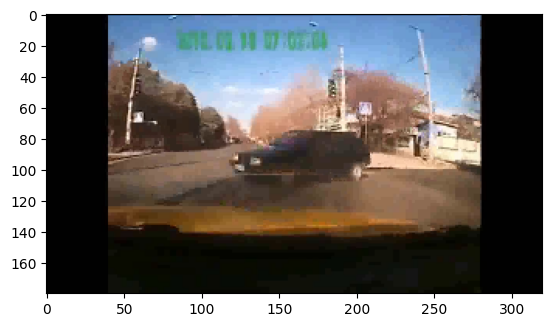

In [3]:
BASE_PATH = "../images/"
FILENAME = "/C_000001_"
FRAME = "30"
SCALE = 4

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
plt.imshow(img[::SCALE,::SCALE,::-1])

In [4]:
TABLENAME = "../dataset/Crash_Table.csv"

df = pd.read_csv(TABLENAME)
#print(df.columns)

arr = []

for ind in df.index:
    for i in range(1, 51):
        arr.append(df[f"frame_{i}"][ind])

print(len(arr))

75000


In [5]:
dataset = keras.preprocessing.image_dataset_from_directory("../images", labels=arr, batch_size=128, label_mode='int')

Found 75000 files belonging to 1 classes.


In [6]:
dataset = dataset.map(lambda x, y: (x / 255.0, y))

In [7]:
train_size = int(len(dataset) * 0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

tf.Tensor(0, shape=(), dtype=int32)


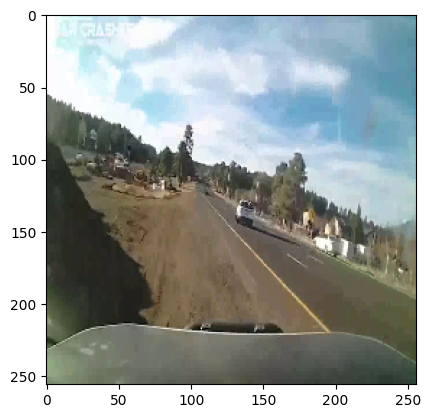

In [8]:
for t in train_ds.take(1):
    plt.imshow(t[0][0])
    print(t[1][0])

In [9]:
model.fit(train_ds, epochs=22, verbose=1, validation_data=test_ds)

Epoch 1/22
468/468 [==============================] - 913s 2s/step - loss: 0.5546 - binary_accuracy: 0.7441 - val_loss: 0.5083 - val_binary_accuracy: 0.7546
Epoch 2/22
468/468 [==============================] - 859s 2s/step - loss: 0.4852 - binary_accuracy: 0.7667 - val_loss: 0.4555 - val_binary_accuracy: 0.7874
Epoch 3/22
468/468 [==============================] - 865s 2s/step - loss: 0.4365 - binary_accuracy: 0.7952 - val_loss: 0.4047 - val_binary_accuracy: 0.8182
Epoch 4/22
468/468 [==============================] - 863s 2s/step - loss: 0.3828 - binary_accuracy: 0.8264 - val_loss: 0.3418 - val_binary_accuracy: 0.8459
Epoch 5/22
468/468 [==============================] - 869s 2s/step - loss: 0.3196 - binary_accuracy: 0.8614 - val_loss: 0.2804 - val_binary_accuracy: 0.8824
Epoch 6/22
468/468 [==============================] - 886s 2s/step - loss: 0.2685 - binary_accuracy: 0.8859 - val_loss: 0.2489 - val_binary_accuracy: 0.8969
Epoch 7/22
468/468 [==============================] - 977s

In [10]:
model.save("Acc3v2.h5")

1/1 [==============================] - 0s 31ms/step
1.0
Crash


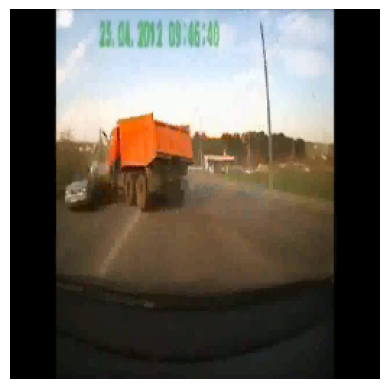

In [17]:
FILENAME = "/C_000002_"
FRAME = "44"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")

1/1 [==============================] - 0s 52ms/step
0.0
No crash


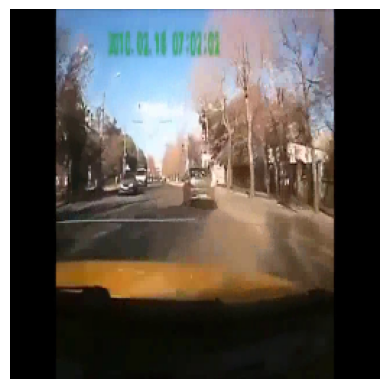

In [12]:
FILENAME = "/C_000001_"
FRAME = "10"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")

1/1 [==============================] - 0s 38ms/step
0.0
No crash


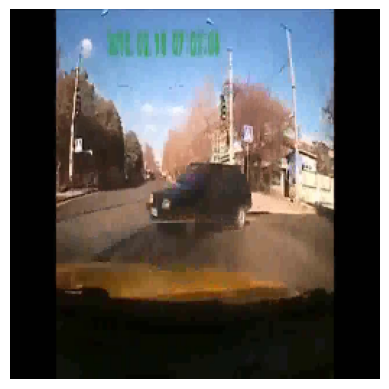

In [22]:
FILENAME = "/C_000001_"
FRAME = "30"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")

1/1 [==============================] - 0s 16ms/step
1.0
Crash


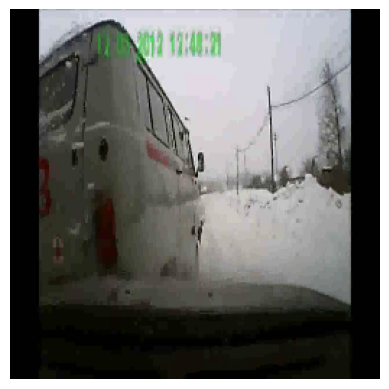

In [26]:
FILENAME = "/C_000006_"
FRAME = "47"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")

1/1 [==============================] - 0s 16ms/step
1.0
Crash


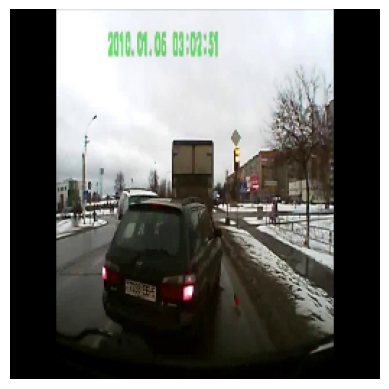

In [29]:
FILENAME = "/C_000007_"
FRAME = "34"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")

1/1 [==============================] - 0s 53ms/step
1.0
Crash


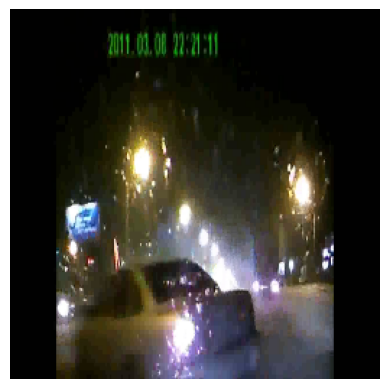

In [34]:
FILENAME = "/C_000010_"
FRAME = "33"

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
img = cv2.resize(img, (256, 256))
plt.axis("off")
plt.imshow(img[:,:,::-1])

crash = model.predict(img.reshape(-1, 256, 256, 3))[0][0]
print(crash)

if crash > 0.5:
    print("Crash")
else:
    print("No crash")